# Lompe example - North America

This an example of the Lompe technique applied in a grid over North America on 5 April 2012. The data input is from *SuperMAG* (ground magnetometers), *Iridium* (space magnetometer data, provided by [AMPERE](http://ampere.jhuapl.edu/)), and *SuperDARN* (ground radar measurements of line-of-sight F-region plasma convection). For simplicity we use the *Hardy et al. (1987)* model to specify auroral conductance. Solar conductance is calcualted by the method described in the Lompe paper ([Laundal et al. 2022](https://doi.org/10.1029/2022JA030356)). 

*Change note (June 2023)*: Updated notebook to use the new `error` and `iweight` keywords instead of `scale`

Start by loading relevant modules:

## Import relevant libraries

In [43]:
#BELOW: Trying to use geographic data from 405 to 410UTC with lambda values of l1=10 and l2=100

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import lompe
import apexpy
import xarray as xr
import pydarnio
import warnings
from apexpy import Apex
from pydarn import SuperDARNRead
from lompe.model.cmodel import Cmodel
from lompe.data_tools import dataloader

## Trying to use Superdarn data

In [2]:
#define fitacfs

fitacfs = ['/Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.ksr.a.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.kap.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.fhw.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.fhe.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.hok.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.hkw.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.cvw.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.cve.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.rkn.b.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.rkn.a.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.pgr.b.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.pgr.a.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.kod.d.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.inv.b.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.jme.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.inv.a.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.cly.b.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.cly.a.fitacf','/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.sas.a.fitacf', '/Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.sas.b.fitacf']
type(fitacfs)


list

In [3]:
import lompe
from FBI.process import prepare_lompe_inputs

In [4]:
scan_time = dt.datetime(2022, 8, 30, 4)

In [5]:
import datetime as dt
import apexpy
from FBI import fitacf
all_data = fitacf.read_fitacfs(fitacfs, cores=5)  # this reads in data from a list of fitacf files
time = dt.datetime(2022, 8, 30, 4)  # Time of interest. Change accordingly.
apex = apexpy.Apex(time, refh=300)  # Make an apexpy object for coordinate transforms 
superdarn_data, _ = prepare_lompe_inputs(apex, all_data, scan_time, 120, True)  # Make the lompe data object


2024-07-17 20:28:30,677	INFO worker.py:1771 -- Started a local Ray instance.


(sdarnreadmulti pid=76301) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.fhw.fitacf
(sdarnreadmulti pid=76302) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.fhe.fitacf
(sdarnreadmulti pid=76300) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.hok.fitacf
(sdarnreadmulti pid=76299) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.kap.fitacf
(sdarnreadmulti pid=76298) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0402.00.ksr.a.fitacf
(sdarnreadmulti pid=76298) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.hkw.fitacf
(sdarnreadmulti pid=76302) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.cvw.fitacf
(sdarnreadmulti pid=76299) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0401.00.cve.fitacf
(sdarnreadmulti pid=76301) Reading: /Users/arhulber/Downloads/8.30 superdarn files/20220830.0400.00.rkn.b.fita

In [6]:
# model = lompe.Emodel(canada_grid, Hall_Pedersen_conductance=(SH, SP))  # Assuming you’ve already defined conductances and have your own grid set up
# model.add_data(superdarn_data)  # Add other data objects as appropriate
# model.run_inversion(l1=10, l2=0.1, lapack_driver='gelsy')

## below is failed sdarn attempts (with Jules), keeping just in case

In [2]:
file2 = '/Users/arhulber/Downloads/8.30 superdarn files/FBI_20220830040000_20220830050000.hdf5'

In [3]:
#help(SuperDARNRead)

In [4]:
file = '/Users/arhulber/Downloads/8.30.2022.grd'

In [116]:
#You can read in the data as a list using SuperDARNRead

data = SuperDARNRead(file).read_grid()
print(type(data))
print(type(data[0]))

# data[0]['vector.vel.sd']


<class 'list'>
<class 'collections.OrderedDict'>


In [115]:
len(data)

58

In [114]:
# for x in data:
#     print(type(x))

In [8]:
data[0].keys()

odict_keys(['start.year', 'start.month', 'start.day', 'start.hour', 'start.minute', 'start.second', 'end.year', 'end.month', 'end.day', 'end.hour', 'end.minute', 'end.second', 'stid', 'channel', 'nvec', 'freq', 'major.revision', 'minor.revision', 'program.id', 'noise.mean', 'noise.sd', 'gsct', 'v.min', 'v.max', 'p.min', 'p.max', 'w.min', 'w.max', 've.min', 've.max', 'vector.mlat', 'vector.mlon', 'vector.kvect', 'vector.stid', 'vector.channel', 'vector.index', 'vector.vel.median', 'vector.vel.sd'])

In [158]:
# Jules code



#def get_coords(data, t0, t1):
#     byear, bmon, bday, bhour, bmin = t0.year, t0.month, t0.day, t0.hour, t0.minute
#     eyear, emon, eday, ehour, emin = t1.year, t1.month, t1.day, t1.hour, t1.minute
    
#     bidx = -1
#     eidx = -1
    
#     for i in range(len(data)):
#         x = data[i]
#         a, b, c, d, e = x['start.year'], x['start.month'], x['start.day'], x['start.hour'], x['start.minute']
#         f, g, h, j, k = x['end.year'], x['end.month'], x['end.day'], x['end.hour'], x['end.minute']
#         if (byear == a) and (bmon == b) and (bday == c) and (bhour == d) and (bmin ==e):
#             bidx = i
#             continue
#         if (eyear == f) and (emon == g) and (eday == h) and (ehour == j) and (emin == k):
#             eidx = i
#             break  

#     print(bidx, eidx)
    
#     if bidx == -1 or eidx == -1:
#         print('something went wrong')
#         return 

#     for i in range(bidx, eidx +1):
#         if i == bidx:
#             mlat = data[i]['vector.mlat']
#             mlon = data[i]['vector.mlon']
#             # le = data[i]['le']
#             # ln = data[i]['ln']
#         else:
#             mlat = np.hstack((mlat, data[i]['vector.mlat']))
#             mlon = np.hstack((mlon, data[i]['vector.mlon']))
#             # le = np.hstack((le, data[i]['le']))
#             # ln = np.hstack((ln, data[i]['ln']))

#     # los  = np.vstack((le, ln))
#     coords = np.vstack((mlon, mlat))
    
#     return coords

In [167]:
def get_vlos(data, t0, t1):
    byear, bmon, bday, bhour, bmin = t0.year, t0.month, t0.day, t0.hour, t0.minute
    eyear, emon, eday, ehour, emin = t1.year, t1.month, t1.day, t1.hour, t1.minute
    
    bidx = -1
    eidx = -1
    
    for i in range(len(data)):
        x = data[i]
        a, b, c, d, e = x['start.year'], x['start.month'], x['start.day'], x['start.hour'], x['start.minute']
        f, g, h, j, k = x['end.year'], x['end.month'], x['end.day'], x['end.hour'], x['end.minute']
        if (byear == a) and (bmon == b) and (bday == c) and (bhour == d) and (bmin ==e):
            bidx = i
            continue
        if (eyear == f) and (emon == g) and (eday == h) and (ehour == j) and (emin == k):
            eidx = i
            break  

    print(bidx, eidx)
    
    if bidx == -1 or eidx == -1:
        print('something went wrong')
        return 


    
    if len(data[bidx]['vector.vel.sd']) == len(data[eidx]['vector.vel.sd']):
        vlos = data[bidx]['vector.vel.sd'] + data[eidx]['vector.vel.sd']

    elif len(data[bidx]['vector.vel.sd']) > len(data[eidx]['vector.vel.sd']):
        lower = data[eidx]['vector.vel.sd']
        diff = len(data[bidx]['vector.vel.sd']) - len(data[eidx]['vector.vel.sd']) * (-1)
        print(f'the lower list is eidx and the difference is {diff}')
        n = -1
        while n != (diff - 1):
            new = data[bidx]['vector.vel.sd'][:n]
            n -= 1
    
    elif len(data[bidx]['vector.vel.sd']) < len(data[eidx]['vector.vel.sd']):
        lower = data[bidx]['vector.vel.sd']
        diff = (len(data[eidx]['vector.vel.sd']) - len(data[bidx]['vector.vel.sd'])) * (-1)
        print(f'the lower list is bidx and the difference is {diff}')
        n = -1
        while n != (diff - 1):
            new = data[eidx]['vector.vel.sd'][:n]
            n -= 1
    
    vlos = (lower + new)
    return vlos

In [163]:
def get_coords(data, t0, t1):
    byear, bmon, bday, bhour, bmin = t0.year, t0.month, t0.day, t0.hour, t0.minute
    eyear, emon, eday, ehour, emin = t1.year, t1.month, t1.day, t1.hour, t1.minute
    
    bidx = -1
    eidx = -1
    
    for i in range(len(data)):
        x = data[i]
        a, b, c, d, e = x['start.year'], x['start.month'], x['start.day'], x['start.hour'], x['start.minute']
        f, g, h, j, k = x['end.year'], x['end.month'], x['end.day'], x['end.hour'], x['end.minute']
        if (byear == a) and (bmon == b) and (bday == c) and (bhour == d) and (bmin ==e):
            bidx = i
            continue
        if (eyear == f) and (emon == g) and (eday == h) and (ehour == j) and (emin == k):
            eidx = i
            break  

    print(bidx, eidx)



    
    if bidx == -1 or eidx == -1:
        print('something went wrong')
        return 

    for i in range(bidx, eidx +1):
        if i == bidx:
            mlat = data[i]['vector.mlat']
            mlon = data[i]['vector.mlon']
            # le = data[i]['le']
            # ln = data[i]['ln']
        else:
            mlat = np.hstack((mlat, data[i]['vector.mlat']))
            mlon = np.hstack((mlon, data[i]['vector.mlon']))
            # le = np.hstack((le, data[i]['le']))
            # ln = np.hstack((ln, data[i]['ln']))

    # los  = np.vstack((le, ln))
    coords = np.vstack((mlon, mlat))
    
    return coords

In [160]:
#NOTE: t0 and t1 minutes must be odd numbers

t0 = dt.datetime(2022, 8, 30, 4, 13, 0)
t1 = dt.datetime(2022, 8, 30, 4, 17, 0)

In [161]:
vlos = get_vlos(data, t0, t1)

5 6
the lower list is bidx and the difference is -11


In [153]:
#mlat.shape
#mlon
#vlos
#data[0]['vector.vel.sd'][-1]

In [164]:
#help(lompe.Data)

In [171]:
sd_data = lompe.Data(vlos, coordinates = get_coords(data, t0, t1), LOS = None, datatype = 'convection', error = 50, iweight=1.0) #LOS = los,

5 6


ShapeError: not the same number of coordinates and data points

In [17]:
#You can read in the data as a pydarnio.dmap.superdarn.SDarnRead object using pydarnio.dmap.superdarn.SDarnRead

superdarn2 = pydarnio.dmap.superdarn.SDarnRead(file)
type(superdarn2)

pydarnio.dmap.superdarn.SDarnRead

In [18]:
#Here are all the possible commands/directories within the 'pydarnio.dmap.superdarn.SDarnRead' object
#   .read_records can show you all of the data

#dir(superdarn2)

In [19]:
help(superdarn2.__init__)
y = superdarn2.__init__

#dir(y)

Help on method __init__ in module pydarnio.dmap.superdarn:

__init__(filename: str, stream: bool = False) method of pydarnio.dmap.superdarn.SDarnRead instance
    Extension of DmapRead constructor that reads SuperDARN file/stream type
    into a byte array for reading methods.
    
    Parameters
    ----------
    filename : str or bytes
        file name or data stream (given data_stream=True)
        containing dmap data.
    stream : bool
        default to false, boolean that indicates if dmap_file is a
        data stream
    
    Raises
    ------
    EmptyFileError
        dmap_file is empty
    FileNotFoundError
        dmap_file path does not exist
    
    See Also
    --------
    DmapRead : for inheritance information



In [20]:
#help(pydarnio.dmap.superdarn.SDarnRead)

## Grid - set up analysis grid and plot to see location

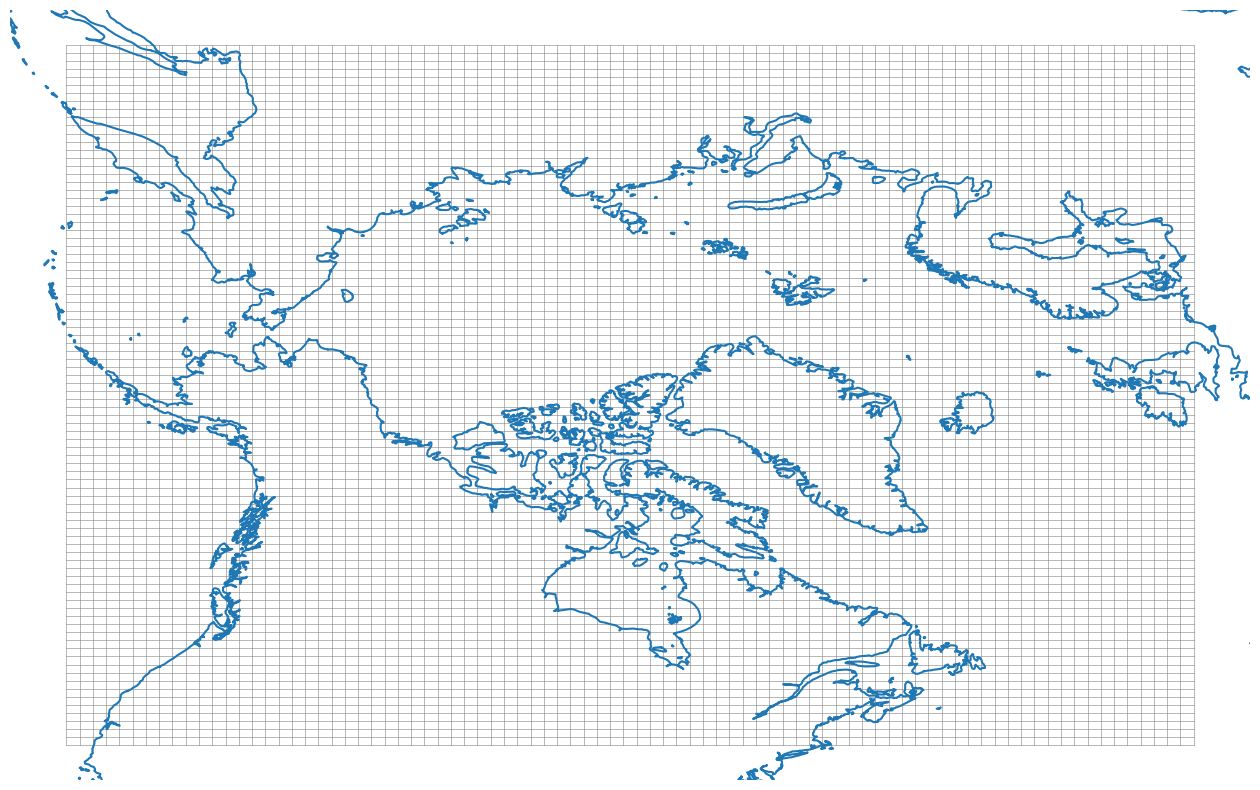

In [6]:
#cubed sphere grid parameters:
t1 = dt.datetime(2022,8,30,4,40)
a = apexpy.Apex(t1)
mltg = 0
mlatg = 90
mlong = a.mlt2mlon(mltg,t1)
geo_coord = a.apex2geo(mlatg, mlong, 110)
glat = geo_coord[0]
glon = geo_coord[1]


position = (glon, 81)  # lon, lat for grid center
orientation = 0       # angle of grid x axis - anti-clockwise from east direction
L, W = 25000e3, 28000e3 # extents [m] of grid
dL, dW = 100e3, 100e3 # spatial resolution [m] of grid 

# create grid object
grid = lompe.cs.CSgrid(lompe.cs.CSprojection(position, orientation), L, W, dL, dW, R = 6481.2e3)

# plot grid and coastlines
fig, ax = plt.subplots(figsize = (16, 10))
ax.set_axis_off()
for lon, lat in grid.get_grid_boundaries():
    xi, eta = grid.projection.geo2cube(lon, lat)
    ax.plot(xi, eta, color = 'grey', linewidth = .4)

xlim, ylim = ax.get_xlim(), ax.get_ylim()
for cl in grid.projection.get_projected_coastlines():
    ax.plot(cl[0], cl[1], color = 'C0')
    
ax.set_xlim(xlim)
ax.set_ylim(ylim);

## Input data general info

In [7]:
# set time interval
event = '2022-8-30'
hour = 4
minute = 40

# time to plot for
t0 = dt.datetime(2022, 8, 30, 4, 40) #start time
DT = dt.timedelta(seconds = 60 * 5) # length of time intervals

# apex object for plotting in magnetic coordinates
apex = apexpy.Apex(t0, refh = 110)

## Supermag data

In [8]:
#Reading in and converting supermag file from a csv format
import os 
import pandas as pd
import glob

#input path of csv file
general_path = '/Users/arhulber/Downloads/Aug.30.2022.supermag.440to450.csv'

def my_read_smag(event, tempfile_path='/Users/arhulber/Downloads/'):
    file = general_path
    print(file)
    if os.path.isfile(file):
        savefile = tempfile_path + event + '-supermag.pd'
        print(savefile)
        sm = pd.read_csv(file)
        sm.index = pd.to_datetime(sm.Date_UTC)
        
        df = pd.DataFrame({'Be':sm.dbe_geo.values.flatten(), 'Bn':sm.dbn_geo.values.flatten(), 'Bu':-sm.dbz_geo.values.flatten(),
                            'lat':sm.GEOLAT.values.flatten(), 'lon':sm.GEOLON.values.flatten()},
                            index = sm.index).sort_index()
    
        #Save the dataset
        pd.to_pickle(df, savefile, protocol=4)
        return savefile
    else:
        print('SuperMAG data not found. Download from website or implement the API.')
        return None

In [9]:
my_read_smag('2022-08-30')

/Users/arhulber/Downloads/Aug.30.2022.supermag.440to450.csv
/Users/arhulber/Downloads/2022-08-30-supermag.pd


'/Users/arhulber/Downloads/2022-08-30-supermag.pd'

## Trying to turn sdarn data into a pickle file

In [6]:
file_name2 = '/Users/arhulber/Downloads/8.30 superdarn files/Aug.30.2022.sdarn.400to500.hdf5'

In [7]:
import h5py
import pickle

def hdf5_to_pickle(hdf5_filename, pickle_filename):
    # Open the HDF5 file for reading
    with h5py.File(hdf5_filename, 'r') as hdf5_file:
        # Initialize dictionary to store data
        data = {}

        # Function to recursively extract data from HDF5 groups
        def extract_data(group, parent_key=''):
            for key in group.keys():
                full_key = f"{parent_key}/{key}".lstrip('/')
                item = group[key]

                if isinstance(item, h5py.Group):
                    # Recursively extract data from sub-groups
                    extract_data(item, full_key)
                elif isinstance(item, h5py.Dataset):
                    # If it's a dataset, extract its value
                    data[full_key] = item[()]

        # Start extracting data from the root group of the HDF5 file
        extract_data(hdf5_file)

    # Save data to pickle file
    with open(pickle_filename, 'wb') as pickle_file:
        pickle.dump(data, pickle_file)

# Example usage:
hdf5_filename = file_name2  # Replace with your HDF5 file
pickle_filename = 'output.pkl'   # Replace with desired output pickle file

hdf5_to_pickle(hdf5_filename, pickle_filename)

In [8]:
superdarnfn = '/Users/arhulber/Downloads/output.pkl'
superdarn1 = pd.read_pickle(superdarnfn)
type(superdarn1)

dict

In [9]:
import pickle
import pandas as pd
import numpy as np

# Load data from pickle file into a dictionary
pickle_filename = '/Users/arhulber/Downloads/output.pkl'  # Replace with your pickle file path
with open(pickle_filename, 'rb') as pickle_file:
    data = pickle.load(pickle_file)

# Find maximum length among all arrays
max_length = max(len(v) for v in data.values() if isinstance(v, np.ndarray))

# Pad or concatenate arrays to match max_length
for key in data:
    if isinstance(data[key], np.ndarray) and len(data[key]) < max_length:
        # Pad array with np.nan to match max_length
        pad_length = max_length - len(data[key])
        data[key] = np.concatenate([data[key], np.full(pad_length, np.nan)])

# Convert dictionary to Pandas DataFrame
df = pd.DataFrame.from_dict(data)

# Now df is your Pandas DataFrame
print(df.head())  # Print first few rows to verify

   0/bound_mlats  0/bound_mlons  0/e_pot_model  0/mlats_darngrid  0/mlats_los  \
0      77.086411     166.064896  -24495.997013              60.5    76.411057   
1      77.440872     168.539719  -24956.997013              60.5    76.507301   
2      77.770920     171.149521  -25440.997013              60.5    76.577858   
3      78.074646     173.894547  -25949.997013              60.5    76.841492   
4      78.350075     176.772644  -26482.997013              60.5    77.092270   

   0/mlats_model  0/mlons_darngrid  0/mlons_los  0/mlons_model  0/rids  ...  \
0      77.086411        -87.457627   -28.340839     166.064896    65.0  ...   
1      77.440872        -85.423729   -26.860403     168.539719    65.0  ...   
2      77.770920        -83.389831   -25.344210     171.149521    65.0  ...   
3      78.074646        -30.508475   -25.571772     173.894547    65.0  ...   
4      78.350075        -28.474576   -25.805477     176.772644    65.0  ...   

   9/scan_minute  9/scan_month  9/scan

In [10]:
superdarn = df
superdarn[file_index][0]

NameError: name 'file_index' is not defined

In [24]:
type(superdarn)

pandas.core.frame.DataFrame

## SuperDARN data

In [5]:
import h5py
import pickle

def hdf5_to_pickle(file_name2, pickle_filename):
    # Open the HDF5 file for reading
    with h5py.File(file_name2, 'r') as hdf5_file:
        # Read data from HDF5 file
        data = {}
        for key in hdf5_file.keys():
            data[key] = hdf5_file[key][()]

    # Save data to pickle file
    with open(pickle_filename, 'wb') as pickle_file:
        pickle.dump(data, pickle_file)

# Example usage:
hdf5_filename = file_name  # Replace with your HDF5 file
pickle_filename = 'output.pkl'   # Replace with desired output pickle file

hdf5_to_pickle(hdf5_filename, pickle_filename)

TypeError: Accessing a group is done with bytes or str, not <class 'tuple'>

In [31]:
basepath = '/Users/arhulber/Downloads/8.30 superdarn files/Aug.30.2022.sdarn.400to500.hdf5'

In [32]:
tempfile_path = '/Users/arhulber/Downloads/8.30 superdarn files'

In [33]:
superdarn = pd.read_hdf(dataloader.read_sdarn(event, basepath, tempfile_path))

SuperDARN data not found in basepath.


NotImplementedError: Support for generic buffers has not been implemented.

In [21]:
file_path2 = '/Users/arhulber/Downloads/8.30 superdarn files/Aug.30.2022.sdarn.400to500.hdf5'

In [22]:
ncf = nc4.Dataset(file_path2, diskless=True, persist=False)

In [26]:
hdf5_group_name = '1'
nch = ncf.groups.get(hdf5_group_name)
xds1 = xr.open_dataset(xr.backends.NetCDF4DataStore(nch))
xds1

<xarray.Dataset>
Dimensions:         (phony_dim_6: 206, phony_dim_7: 2632, phony_dim_8: 1167,
                     phony_dim_9: 1176, phony_dim_10: 1664, phony_dim_11: 1)
Dimensions without coordinates: phony_dim_6, phony_dim_7, phony_dim_8,
                                phony_dim_9, phony_dim_10, phony_dim_11
Data variables: (12/23)
    bound_mlats     (phony_dim_6) float64 ...
    bound_mlons     (phony_dim_6) float64 ...
    e_pot_model     (phony_dim_7) float64 ...
    mlats_darngrid  (phony_dim_8) float64 ...
    mlats_los       (phony_dim_9) float64 ...
    mlats_model     (phony_dim_7) float64 ...
    ...              ...
    v_e_darngrid    (phony_dim_8) float64 ...
    v_e_los         (phony_dim_9) float64 ...
    v_e_model       (phony_dim_7) float64 ...
    v_n_darngrid    (phony_dim_8) float64 ...
    v_n_los         (phony_dim_9) float64 ...
    v_n_model       (phony_dim_7) float64 ...

In [27]:
xds = xds1.to_dataframe()

MemoryError: Unable to allocate 8.80 PiB for an array with shape (206, 2632, 1167, 1176, 1664, 1) and data type float64

In [28]:
#print(ncf.groups)

In [7]:
file_path2 = '/Users/arhulber/Downloads/8.30 superdarn files/Aug.30.2022.sdarn.400to500.hdf5'

In [11]:
with h5py.File(file_path2, 'r') as f:
    # List all datasets in the file
    dataset_names = list(f.keys())
    print("Dataset Names:", dataset_names)

Dataset Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
df = pd.DataFrame(dataset[:])

In [8]:
superdarnfn = '/Users/arhulber/Downloads/8.30 superdarn files/Aug.30.2022.sdarn.400to500.hdf5' 

In [9]:
# read the superdarn gridmap file into a pandas dataframe
superdarn = pd.read_hdf(dataloader.read_sdarn(superdarnfn))

# select the time interval of interest (also remove very high speeds)
sd = superdarn.loc[(superdarn.index >= t0 - DT) & (superdarn.index <= t0 + DT) & (superdarn.vlos < 2000)].dropna()

# make the Lompe data object
vlos = sd['vlos'].values
coords = np.vstack((sd['glon'].values, sd['glat'].values))
los  = np.vstack((sd['le'].values, sd['ln'].values))
# lompe.Data is the Lompe data format
#sd_data = lompe.Data(vlos, coordinates = coords, LOS = los, datatype = 'convection', scale = 500 ) 

sd_data = lompe.Data(vlos, coordinates = coords, LOS = los, datatype = 'convection', error = 50, iweight=1.0 )

SuperDARN data not found in basepath.


NotImplementedError: Support for generic buffers has not been implemented.

## AMPERE/Iridium data

In [10]:
#Opening the data set from the downloaded file
iridium1 = xr.open_dataset('/Users/arhulber/Downloads/Aug.30.2022.ampere.grid.440to450.ncdf')
iridium1

<xarray.Dataset>
Dimensions:       (nRec: 5, nObs: 1200, vComp: 3)
Dimensions without coordinates: nRec, nObs, vComp
Data variables: (12/34)
    npnt          (nRec) int16 ...
    year          (nRec) int16 ...
    doy           (nRec) int16 ...
    time          (nRec) float32 ...
    avgint        (nRec) int16 ...
    kmax          (nRec) int16 ...
    ...            ...
    del_db_geo    (nRec, nObs, vComp) float64 ...
    del_jPar      (nRec, nObs) float64 ...
    del_db_Th_Th  (nRec, nObs) float64 ...
    del_db_Ph_Th  (nRec, nObs) float64 ...
    del_db_Th_Ph  (nRec, nObs) float64 ...
    del_db_Ph_Ph  (nRec, nObs) float64 ...
Attributes:
    title:        Ampere data for 2022-08-30 04:40 - 2022-08-30 04:50.
    description:  AMPERE GRD data (fitted magnetic pertubation data).
    created:      2024-07-17T19:46:33-04:00

In [11]:
#Converting the xarray object to a dataframe (pandas)
iridium = iridium1.to_dataframe()

In [87]:
#Parallel mag coords - UPDATE THESE

# irid_B = np.vstack((iridium.db_Ph_Ph.values, iridium.db_Th_Th.values, iridium.db_R.values))
# irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))

In [77]:
#perpendicular mag coords

# irid_B = np.vstack((iridium.db_Th_Ph.values, iridium.db_Ph_Th.values, iridium.db_R.values))
# irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))

In [12]:
#ORIGINAL DATASET

irid_B = np.vstack((iridium.db_P.values, iridium.db_T.values, iridium.db_R.values))
irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))

In [54]:
#use this to view the dataframe table to ensure value presence

# iridium

#Here are all the variables in the dataframe. I downloaded the correct times exactly, so no manipulation is needed to sort through time sections

# iridium.columns

In [22]:
#Opening the data set from the downloaded file
# iridium1 = xr.open_dataset('/Users/arhulber/Downloads/Apr.10.2022.ampere.grid.510to540.ncdf')

In [23]:
#Converting the xarray object to a dataframe (pandas)
# iridium = iridium1.to_dataframe()

In [24]:
#use this to view the dataframe table to ensure value presence

# iridium

#Here are all the variables in the dataframe. I downloaded the correct times exactly, so no manipulation is needed to sort through time sections

# iridium.columns

## Loading in all relevant data - new supermag data (pickle)

In [13]:
event = '2022-08-30'
supermagfn = '/Users/arhulber/Downloads/2022-08-30-supermag.pd' #1
supermag  = pd.read_pickle(supermagfn) #2


# file names and location
#1
#superdarnfn = '../sample_dataset/20120405_superdarn_grdmap.h5' 
#iridiumfn = '../sample_dataset/20120405_iridium.h5'


# load data
# filename = 20240611-20-12-supermag.netcdf
# supermag = pd.read_hdf(dataloader.read_smag(event, basepath, tempfile_path, file_name))
#2
#superdarn = pd.read_hdf(superdarnfn) 
#iridium   = pd.read_hdf(iridiumfn)

## Getting proper data subsets

The data must be passed to the lompe Emodel object (created later) as Lompe Data objects. The data that is passed to the Emodel object is the data that will be used in the inversion. However, the data objects above contain data from a whole day (5 April 2012), and we may want to loop over smaller subsets. Here is a function that returns subsets of the data:

In [19]:
type(supermag)

pandas.core.frame.DataFrame

In [33]:
# sd = superdarn_data

In [14]:
def get_data_subsets(t0, t1):
    """ return subsets of data loaded above, between t0 and t1 """


    
    # Iridium data:

    #para geomag
    # irid_B = np.vstack((iridium.db_Ph_Ph.values, iridium.db_Th_Th.values, iridium.db_R.values))
    # irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))

    
    #perp geomag
    #irid_B = np.vstack((iridium.db_Th_Ph.values, iridium.db_Ph_Th.values, iridium.db_R.values))
    #irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))

    #geographic coords
    irid_B = np.vstack((iridium.db_P.values, iridium.db_T.values, iridium.db_R.values))
    irid_coords = np.vstack((iridium.nLatGrid.values, iridium.geo_cLat_deg.values)) #, iridium.R.values))



    # SuperMAG data:
    smag = supermag.loc[t0:t1, :]
    print(smag.head())
    smag_B = np.vstack((smag.Be.values, smag.Bn.values, smag.Bu.values))
    smag_coords = np.vstack((smag.lon.values, smag.lat.values))


    #SuperDARN data:
    # sd = superdarn_data.loc[t0:t1, :]
    # vlos = sd['vlos'].values
    # sd_coords = np.vstack((sd['glon'].values, sd['glat'].values))
    # los  = np.vstack((sd['le'].values, sd['ln'].values))



    iridium_data   = lompe.Data(irid_B * 1e-9, irid_coords,            datatype = 'space_mag_fac', iweight = 1.0, error = 30e-9)
    supermag_data  = lompe.Data(smag_B * 1e-9, smag_coords,            datatype = 'ground_mag'   , iweight = 0.7, error = 10e-9) #suggested iweight = .4
    return(iridium_data, supermag_data, superdarn_data)


## Set up model and run inversion

Now we have everything we need to set up the Lompe Emodel, add data, and run the inversion for the electric field. If we loop though the whole day, we will plot the output using a function called lompeplot and save the output so that it can be stitched together in a video later. 

For the conductance, we will use the Hardy model with Kp=4, in addition to solar EUV.

a
b
                        Be     Bn     Bu    lat     lon
Date_UTC                                               
2022-08-30 04:43:00    NaN    NaN    NaN  68.35   18.82
2022-08-30 04:43:00  121.3 -271.9  117.5  69.30   16.03
2022-08-30 04:43:00  -31.5   -0.3   -1.2  56.43   58.57
2022-08-30 04:43:00   46.4 -143.8 -251.1  67.93  306.43
2022-08-30 04:43:00    9.3   23.0    7.2  49.07   14.02
c
ground_mag: Measurement uncertainty effectively changed from 1e-08 to 1.1952286093343936e-08
d


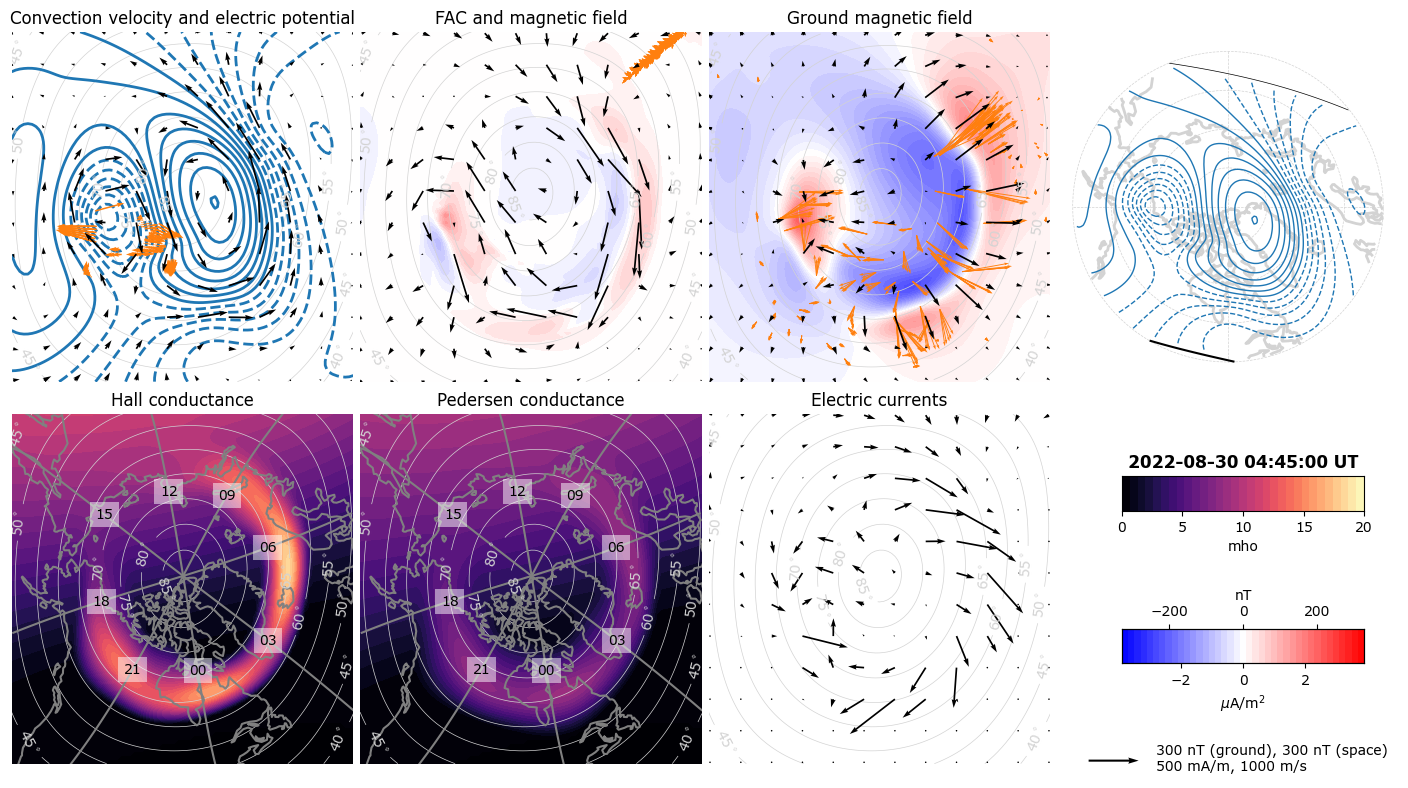

In [16]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# time to plot for
T0 = dt.datetime(2022, 8, 30, 4, 45)
DT = dt.timedelta(seconds = 60 * 5) # length of time interval

# apex object for plotting in magnetic
apex = apexpy.Apex(T0, refh = 110)

# making conductance tuples
Kp = 4 # this is the input to the Hardy model
SH = lambda lon = grid.lon, lat = grid.lat: lompe.conductance.hardy_EUV(lon, lat, Kp, T0, 'hall')
SP = lambda lon = grid.lon, lat = grid.lat: lompe.conductance.hardy_EUV(lon, lat, Kp, T0, 'pedersen')
print('a')
# Create Emodel object. Pass grid and Hall/Pedersen conductance functions
model = lompe.Emodel(grid, Hall_Pedersen_conductance = (SH, SP))

print('b')

# add datasets to model
iridium_data, supermag_data, superdarn_data = get_data_subsets(T0 - DT/2, T0 + DT/2) # data from new model time
#ADDED BELOW
model.add_data(iridium_data, supermag_data, superdarn_data)

# iridium_data, supermag_data = get_data_subsets(T0 - DT/2, T0 + DT/2) # data from new model time
# model.add_data(iridium_data, supermag_data)

print('c')

# Run inversion. l1 and l2 are regularization parameters that control the damping of 
# 1) model norm, and 2) gradient of SECS amplitudes (charges) in magnetic eastward direction
model.run_inversion(l1 = 1, l2 = 6)

print('d')

# finally, plot (plot is saved as specified path):
fig = lompe.lompeplot(model, include_data = True, time = T0, apex = apex, savekw = {'fname':'./8.30.2022.445to450.l1l6.sdarninc.pdf'})


# DO NOT USE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import lompe
import apexpy
from apexpy import Apex
from lompe.model.cmodel import Cmodel
from lompe.data_tools import dataloader

##### Grid
Set up analysis grid and plot to see location and orientation on map (over North America).

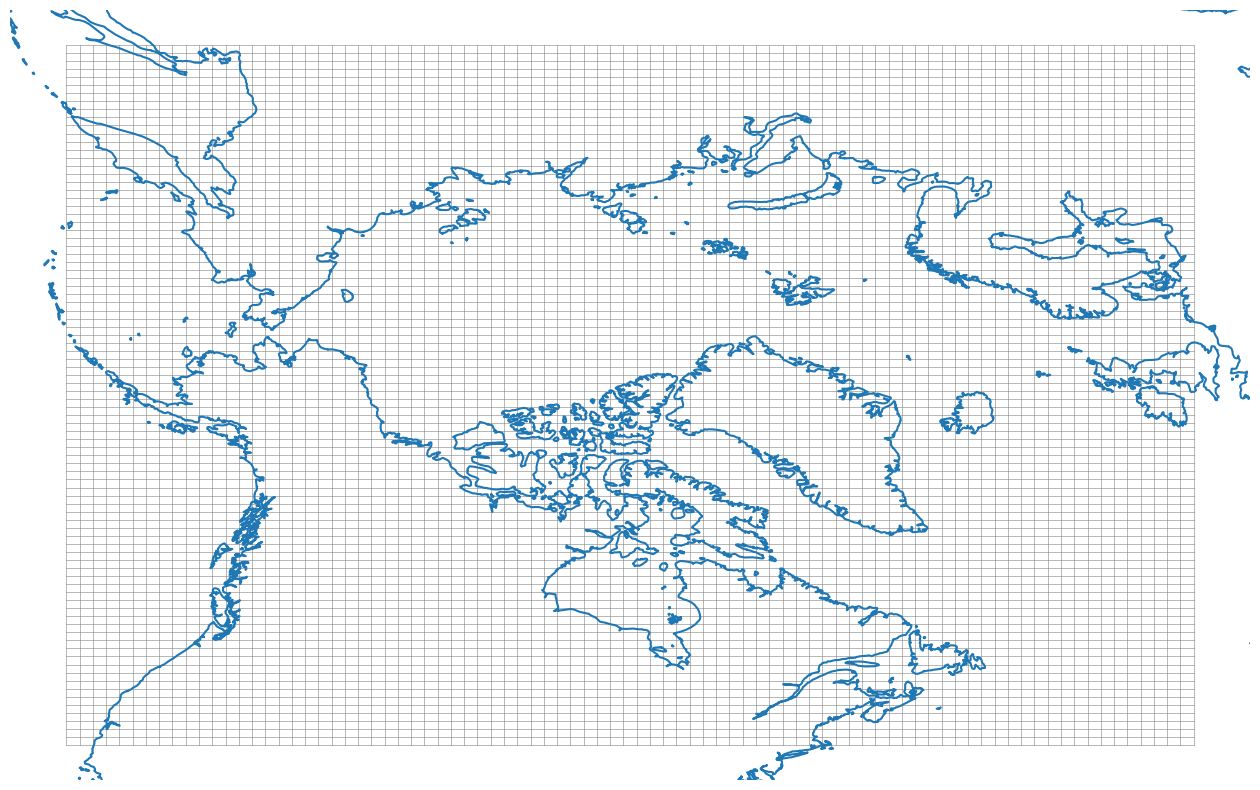

In [5]:
#cubed sphere grid parameters:
t1 = dt.datetime(2022,8,30,4,10)
a = apexpy.Apex(t1)
mltg = 0
mlatg = 90
mlong = a.mlt2mlon(mltg,t1)
geo_coord = a.apex2geo(mlatg, mlong, 110)
glat = geo_coord[0]
glon = geo_coord[1]


position = (glon, 81)  # lon, lat for grid center
orientation = 0       # angle of grid x axis - anti-clockwise from east direction
L, W = 25000e3, 28000e3 # extents [m] of grid
dL, dW = 100e3, 100e3 # spatial resolution [m] of grid 

# create grid object
grid = lompe.cs.CSgrid(lompe.cs.CSprojection(position, orientation), L, W, dL, dW, R = 6481.2e3)

# plot grid and coastlines
fig, ax = plt.subplots(figsize = (16, 10))
ax.set_axis_off()
for lon, lat in grid.get_grid_boundaries():
    xi, eta = grid.projection.geo2cube(lon, lat)
    ax.plot(xi, eta, color = 'grey', linewidth = .4)

xlim, ylim = ax.get_xlim(), ax.get_ylim()
for cl in grid.projection.get_projected_coastlines():
    ax.plot(cl[0], cl[1], color = 'C0')
    
ax.set_xlim(xlim)
ax.set_ylim(ylim);

##### Input data
Next, load datasets. For this example, the files are pre-made and saved in *'./sample_dataset'*. See *Data_handling_with_Lompe* for explanation on how to get the data on this format.

In [6]:
# set time interval
event = '2022-8-30'
hour = 0
minute = 35

# time to plot for
T0 = dt.datetime(2022, 8, 30, 4, 10)
DT = dt.timedelta(seconds = 60 * 2) # length of time interval

# apex object for plotting in magnetic coordinates
apex = apexpy.Apex(T0, refh = 110)


In [7]:
#Reading in and converting supermag file from a csv format
import os 
import pandas as pd
import glob

#input path of csv file
general_path = '/Users/arhulber/Downloads/20240701-16-17-supermag.csv'

def my_read_smag(event, tempfile_path='/Users/arhulber/Downloads/'):
    file = general_path
    print(file)
    if os.path.isfile(file):
        savefile = tempfile_path + event + '-supermag.pd'
        print(savefile)
        sm = pd.read_csv(file)
        sm.index = pd.to_datetime(sm.Date_UTC)
        
        df = pd.DataFrame({'Be':sm.dbe_geo.values.flatten(), 'Bn':sm.dbn_geo.values.flatten(), 'Bu':-sm.dbz_geo.values.flatten(),
                            'lat':sm.GEOLAT.values.flatten(), 'lon':sm.GEOLON.values.flatten()},
                            index = sm.index).sort_index()
    
        #Save the dataset
        pd.to_pickle(df, savefile, protocol=4)
        return savefile
    else:
        print('SuperMAG data not found. Download from website or implement the API.')
        return None
        

In [8]:
help(dataloader.read_iridium)

Help on function read_iridium in module lompe.data_tools.dataloader:

read_iridium(event, basepath='./', tempfile_path='./', file_name='')
    Convert netcdf files (dB raw) downladed from the AMPERE website (http://ampere.jhuapl.edu/dataraw/index.html) 
    to format used by Lompe.
    
    Parameters
    ----------
    event : str
        string on format 'yyyy-mm-dd' to specify time of event for model.
    basepath : str, optional
        location of netcdf-files downloaded from AMPERE website - fitted data (.ncdf).
        Default: './'
    tempfile_path : str, optional
        location for saving processed data files for event date. Will look here for
        already processed data sets
        Default: './'
    file_name : str, optional
        Option to specify name of raw ncdf from AMPERE. Make sure you name a file
        from the correct date.
        Default: ''
    
    Returns
    -------
    savefile : str
        Path to hdf-file containing Iridium data for Lompe.



In [ ]:
#Reading in and processing AMPERE data

# location of data
tempfile_path1 = '/Users/arhulber/Downloads/' # to put the processed data
basepath1 = tempfile_path1 + 'raw/' # unprocessed downloads
example_event1 = '2022-08-30'

xr.open_dataset

with xr.open_dataset(dataloader.read_iridium(example_event1, basepath1, tempfile_path1, file_name = '20220220.0050.3600.120.north.grd.ncdf')) as ds:
    print(ds.keys())

# get the processed data set
iridium = pd.read_hdf(dataloader.read_iridium(example_event1, basepath1, tempfile_path1, file_name = '20220220.0050.3600.120.north.grd.ncdf'))
#read_hdf(dataloader.read_iridium(example_event1, basepath1, tempfile_path1, file_name = 'ampere_raw_vectors_2_22_2022.ncdf'))


# select the time interval of interest
irid = iridium[(iridium.time >= t0) & (iridium.time <= t0 + DT)]

# make the Lompe data object
irid_B = np.vstack((irid.B_e.values, irid.B_n.values, irid.B_r.values))
irid_coords = np.vstack((irid.lon.values, irid.lat.values, irid.r.values))
# lompe.Data is the Lompe data format
#iridium_data = lompe.Data(irid_B * 1e-9, irid_coords, datatype = 'space_mag_fac', scale = 200e-9)

iridium_data = lompe.Data(irid_B * 1e-9, irid_coords, datatype = 'space_mag_fac', error = 100e-9, iweight=1.0)


In [89]:
my_read_smag('2001-06-02')

/Users/arhulber/Downloads/20240613-13-29-supermag.csv
/Users/arhulber/Downloads/2001-06-02-supermag.pd


'/Users/arhulber/Downloads/2001-06-02-supermag.pd'

In [10]:
event = '2022-08-30'


# file names and location
supermagfn = '/Users/arhulber/Downloads/2022-08-30-supermag.pd'
#superdarnfn = '../sample_dataset/20120405_superdarn_grdmap.h5' 
#iridiumfn = '../sample_dataset/20120405_iridium.h5'

#ISSUE: my supermag data is in a csv format, and there is not a way to download it from supermag as an hdf file. This caused issues later on in the indexing and reading the data to create plots
#ISSUE2: when using the NETCDF format (as recommended in the data handling tab), I am unable to open the file with my computer


# load data
# filename = 20240611-20-12-supermag.netcdf
# supermag = pd.read_hdf(dataloader.read_smag(event, basepath, tempfile_path, file_name))
supermag  = pd.read_pickle(supermagfn)
#superdarn = pd.read_hdf(superdarnfn) 
#iridium   = pd.read_hdf(iridiumfn)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arhulber/Downloads/2022-08-30-supermag.pd'

In [92]:
#supermag.head() #test

The data must be passed to the lompe Emodel object (created later) as Lompe Data objects. The data that is passed to the Emodel object is the data that will be used in the inversion. However, the data objects above contain data from a whole day (5 April 2012), and we may want to loop over smaller subsets. Here is a function that returns subsets of the data:

In [97]:
def get_data_subsets(t0, t1):
    """ return subsets of data loaded above, between t0 and t1 """
    
    # Iridium data:
    #irid = iridium[(iridium.time >= t0) & (iridium.time <= t1)]
    #irid_B = np.vstack((irid.B_e.values, irid.B_n.values, irid.B_r.values))
    #irid_coords = np.vstack((irid.lon.values, irid.lat.values, irid.r.values))

    # SuperMAG data:
    smag = supermag.loc[t0:t1, :]
    print(smag.head())
    smag_B = np.vstack((smag.Be.values, smag.Bn.values, smag.Bu.values))
    smag_coords = np.vstack((smag.lon.values, smag.lat.values))
    
    # SuperDARN data:
    #sd = superdarn.loc[t0:t1, :]
    #vlos = sd['vlos'].values
    #sd_coords = np.vstack((sd['glon'].values, sd['glat'].values))
    #los  = np.vstack((sd['le'].values, sd['ln'].values))

    
    # Make the data objects. The scale keyword determines a weight for the dataset. Increase it to reduce weight
    # 'scale' keyword deprecated as of June 2023 in favor of 'error' and 'iweight' keywords
    #iridium_data   = lompe.Data(irid_B * 1e-9, irid_coords,            datatype = 'space_mag_fac', scale = 200e-9)
    supermag_data  = lompe.Data(smag_B * 1e-9, smag_coords,            datatype = 'ground_mag'   , iweight = 0.4, error = 10e-9)
    #superdarn_data = lompe.Data(vlos         , sd_coords  , LOS = los, datatype = 'convection'   , scale = 500 )
    
    #iridium_data   = lompe.Data(irid_B * 1e-9, irid_coords,            datatype = 'space_mag_fac', iweight = 1.0, error = 30e-9)
    supermag_data  = lompe.Data(smag_B * 1e-9, smag_coords,            datatype = 'ground_mag'   , iweight = 0.4, error = 10e-9)
    #superdarn_data = lompe.Data(vlos         , sd_coords  , LOS = los, datatype = 'convection'   , iweight = 1.0, error = 50 )

    return(supermag_data)


##### Set up model and run inversion
Now we have everything we need to set up the Lompe Emodel, add data, and run the inversion for the electric field. If we loop though the whole day, we will plot the output using a function called lompeplot and save the output so that it can be stitched together in a video later. 

For the conductance, we will use the Hardy model with Kp=4, in addition to solar EUV.

In [98]:
# import os 
# import pandas as pd
# import glob

# general_path = '/Users/arhulber/Downloads/20240610-18-38-supermag.csv'
# #print(__file__)
# def my_read_smag(event, tempfile_path=''):
#     file = general_path + event + '/' + event + '_supermag.csv'
#     print('cool')
#     print(file)
#     if os.path.isfile(file):
#         savefile = tempfile_path + event + '-supermag.pd'
#         sm = pd.read_csv(file)
#         sm.index = pd.to_datetime(sm.Date_UTC)
        
#         df = pd.DataFrame({'Be':sm.dbe_geo.values.flatten(), 'Bn':sm.dbn_geo.values.flatten(), 'Bu':-sm.dbz_geo.values.flatten(),
#                             'lat':sm.GEOLAT.values.flatten(), 'lon':sm.GEOLON.values.flatten()},
#                             index = sm.index).sort_index()
    
#         #Save the dataset
#         pd.to_pickle(df, savefile, protocol=4)
#         return savefile
#     else:
#         print('SuperMAG data not found. Download from website or implement the API.')
#         return None

a


/Users/arhulber/lompe/lompe/utils/time.py:107: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')


b
                        Be     Bn     Bu    lat     lon
Date_UTC                                               
2001-06-02 02:28:00   11.6  -18.4    2.6   9.03   38.77
2001-06-02 02:28:00    1.6  -21.1   -1.3  18.62   72.87
2001-06-02 02:28:00  174.0 -433.2  148.2  68.35   18.82
2001-06-02 02:28:00  -55.7 -191.6  -18.1  82.50  297.50
2001-06-02 02:28:00   -8.8 -185.1  -87.0  65.60  322.37
c
The provided iweights were re-scaled so max(iweights)=1


/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 

d


/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 

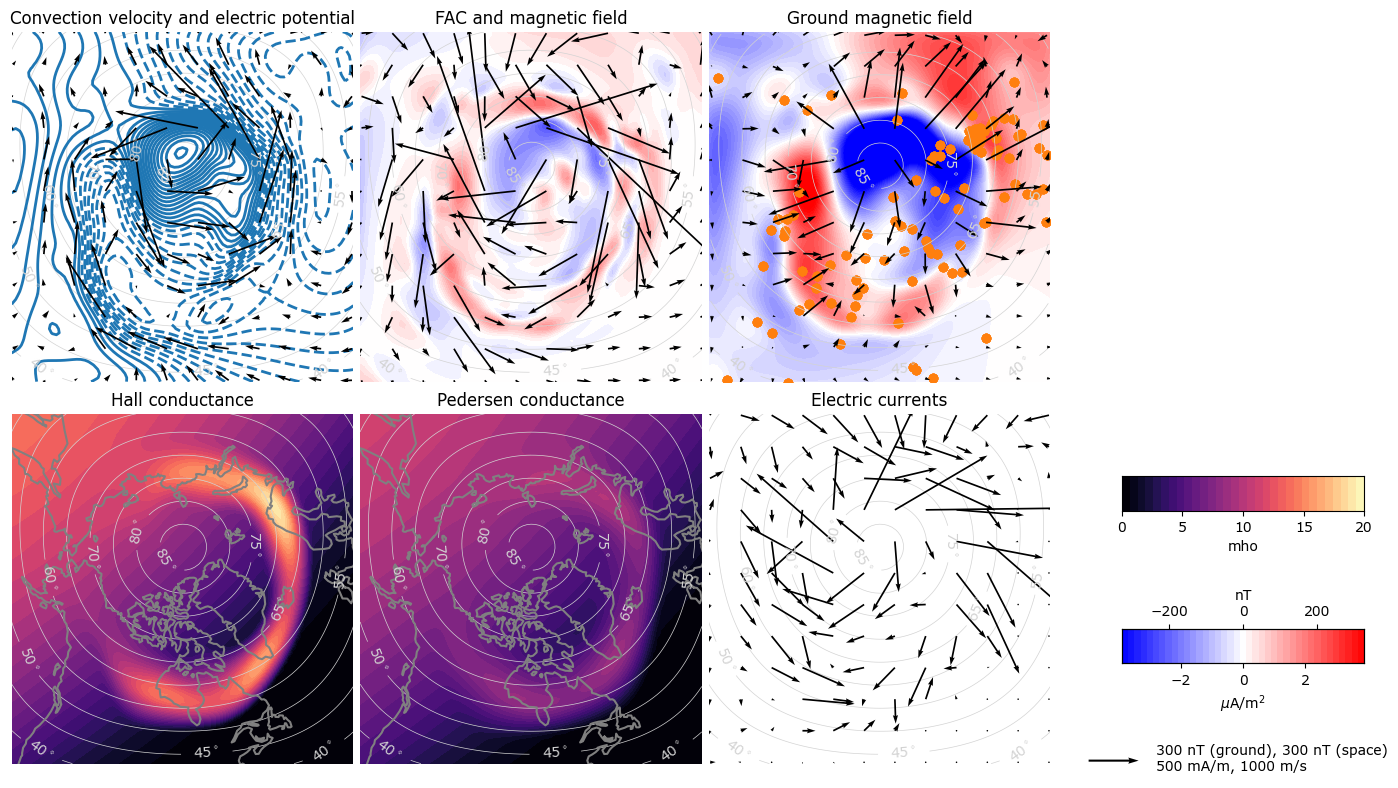

/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 

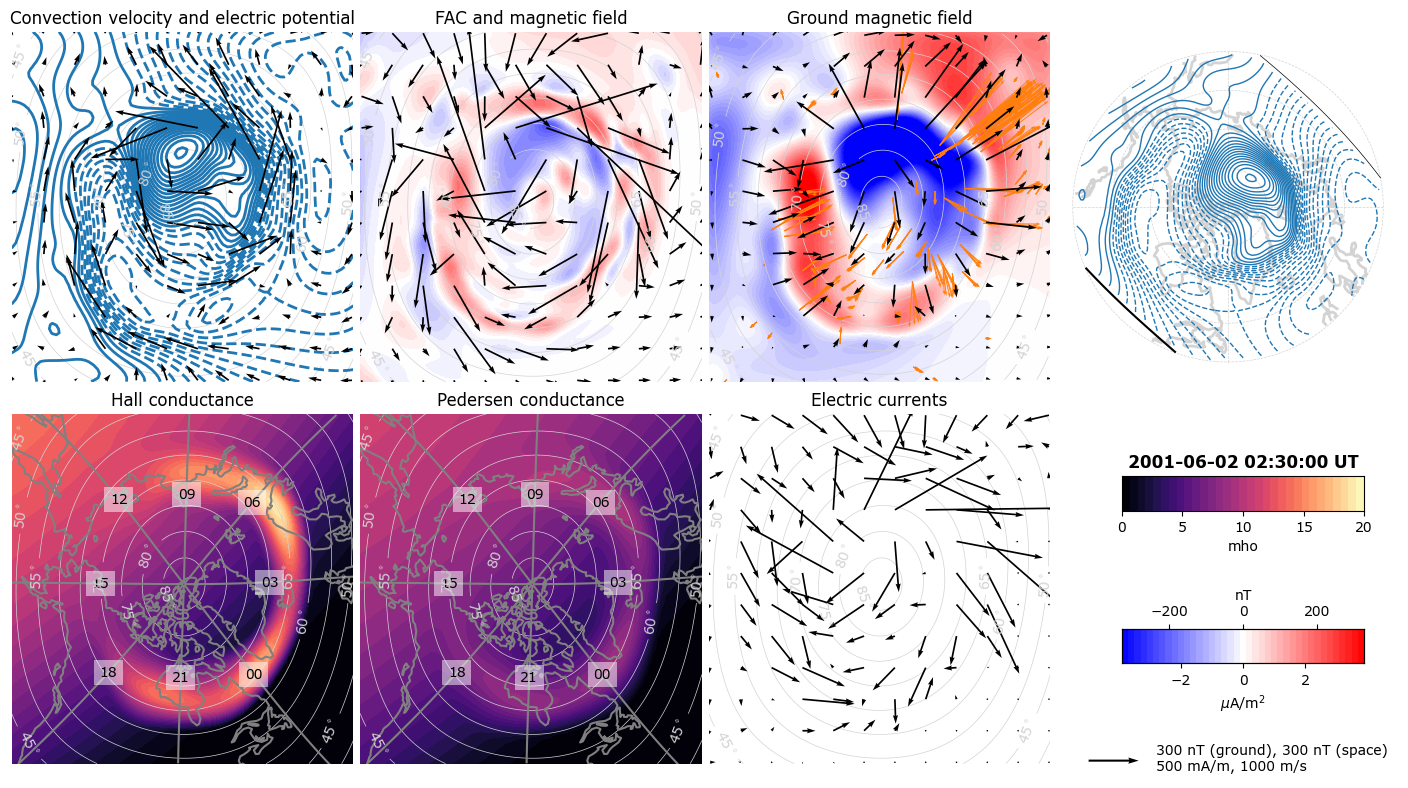

In [99]:
# time to plot for
T0 = dt.datetime(2001, 6, 2, 2, 30)
DT = dt.timedelta(seconds = 60 * 4) # length of time interval

# apex object for plotting in magnetic
apex = apexpy.Apex(T0, refh = 110)

# making conductance tuples

Kp = 4 # this is the input to the Hardy model
SH = lambda lon = grid.lon, lat = grid.lat: lompe.conductance.hardy_EUV(lon, lat, Kp, T0, 'hall')
SP = lambda lon = grid.lon, lat = grid.lat: lompe.conductance.hardy_EUV(lon, lat, Kp, T0, 'pedersen')

print('a')
# Create Emodel object. Pass grid and Hall/Pedersen conductance functions
model = lompe.Emodel(grid, Hall_Pedersen_conductance = (SH, SP))

print('b')

# add datasets to model
supermag_data = get_data_subsets(T0 - DT/2, T0 + DT/2) # data from new model time
model.add_data(supermag_data)

print('c')

# Run inversion. l1 and l2 are regularization parameters that control the damping of 
# 1) model norm, and 2) gradient of SECS amplitudes (charges) in magnetic eastward direction
model.run_inversion(l1 = 1, l2 = 10)
print('d')


# finally, plot (plot is saved as specified path):
fig = lompe.lompeplot(model, show_data_location=True)

fig = lompe.lompeplot(model, include_data = True, time = T0, apex = apex, savekw = {'fname':'./2001-06-02smagplots.pdf'})

In [ ]:
Bgmod = model.B_ground(lon=38.77, lat=9.03, r=6481.2e3)
Bgmod

The top row shows, from left to right (input data is shown in orange): 
- Convection flow field and electric potential contours
- horizontal magnetic field disturbances 110 km above the ionosphere as black arrows and radial current density as color contours
- horizontal ground magnetic field perturbations as black arrows and radial magnetic field perturbations as color contours
- a map that shows the grid’s position and orientation with respect to apex magnetic latitude and local time.

The bottom row shows, from left to right: 
- Pedersen conductance
- Hall conductance
- horizontal height-integrated ionospheric currents based on Lompe output
- color scale / vector scales

This is the end of the example.


#### Below you can test how it works when removing some of the input data:

If you want to get a Lompe model for a specific time *t* during the *event* date, you do not need to make an entirely new model if the model object already has been created. The grid/observation geometry, apex, IGRF, etc. will stay the same throughout the entire day. What is changing is the input data. We can replace the input data in the model object using the class function *clear_model()*.

In [ ]:
# clear model and pass conductances
model.clear_model(Hall_Pedersen_conductance = (SH, SP))

################
# Here you can experiment with adding only some of the datasets to the model by changing which lines are comments:

#model.add_data(iridium_data)
model.add_data(supermag_data)
#model.add_data(superdarn_data)

################

# Run inversion. l1 and l2 are regularization parameters that control the damping of 
# 1) model norm, and 2) gradient of SECS amplitudes (charges) in magnetic eastward direction
model.run_inversion(l1 = 1, l2 = 10)

# Finally, plot:
fig = lompe.lompeplot(model, include_data = True, time = T0, apex = apex, savekw = {'fname':'./output_figures/north_america_mag.pdf'})

The provided iweights were re-scaled so max(iweights)=1


/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  delta_year = pd.TimedeltaIndex((fracyear - year)*(365 + is_leapyear(year)), unit = 'D')
/opt/anaconda3/lib/python3.11/site-packages/ppigrf/ppigrf.py:139: FutureWarning: The 

See how the model output changes when varying the different sources of input data.